##**Imports**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)



##**Loading the dataset**



In [ ]:
df= pd.read_csv('/content/dkd_dataset_final.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      450 non-null    object
 1   blood_pressure           450 non-null    object
 2   specific_gravity         450 non-null    object
 3   albumin                  450 non-null    object
 4   sugar                    450 non-null    object
 5   red_blood_cells          450 non-null    object
 6   pus_cell                 450 non-null    object
 7   pus_cell_clumps          450 non-null    object
 8   bacteria                 450 non-null    object
 9   blood_glucose_random     450 non-null    object
 10  blood_urea               450 non-null    object
 11  serum_creatinine         450 non-null    object
 12  sodium                   450 non-null    object
 13  potassium                450 non-null    object
 14  haemoglobin              450 non-null    o

In [ ]:
df.shape


(450, 25)

##**Data preprocessing**

In [ ]:
#Changing '?' to 'NaN'
df.replace(to_replace = {'?':None},inplace=True)
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48,80,1.02,1,0,None,normal,notpresent,notpresent,121,36,1.2,None,None,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,None,normal,notpresent,notpresent,None,18,0.8,None,None,11.3,38,6000,None,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,None,None,9.6,31,7500,None,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,None,None,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Changing the data type of speific columns from object to numeric

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['blood_pressure'] = pd.to_numeric(df['blood_pressure'], errors='coerce')
df['specific_gravity'] = pd.to_numeric(df['specific_gravity'], errors='coerce')
df['albumin'] = pd.to_numeric(df['albumin'], errors='coerce')
df['sugar'] = pd.to_numeric(df['sugar'], errors='coerce')
df['blood_glucose_random'] = pd.to_numeric(df['blood_glucose_random'], errors='coerce')
df['blood_urea'] = pd.to_numeric(df['blood_urea'], errors='coerce')
df['serum_creatinine'] = pd.to_numeric(df['serum_creatinine'], errors='coerce')
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')
df['potassium'] = pd.to_numeric(df['potassium'], errors='coerce')
df['haemoglobin'] = pd.to_numeric(df['haemoglobin'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      441 non-null    float64
 1   blood_pressure           438 non-null    float64
 2   specific_gravity         389 non-null    float64
 3   albumin                  396 non-null    float64
 4   sugar                    401 non-null    float64
 5   red_blood_cells          278 non-null    object 
 6   pus_cell                 359 non-null    object 
 7   pus_cell_clumps          425 non-null    object 
 8   bacteria                 425 non-null    object 
 9   blood_glucose_random     403 non-null    float64
 10  blood_urea               426 non-null    float64
 11  serum_creatinine         432 non-null    float64
 12  sodium                   358 non-null    float64
 13  potassium                357 non-null    float64
 14  haemoglobin              3

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [None 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' None] values

pus_cell_clumps has ['notpresent' 'present' None] values

bacteria has ['notpresent' 'present' None] values

hypertension has ['yes' 'no' None] values

diabetes_mellitus has ['yes' 'no' None] values

coronary_artery_disease has ['no' 'yes' None] values

appetite has ['good' 'poor' None] values

peda_edema has ['no' 'yes' None] values

aanemia has ['no' 'yes' None] values

class has ['ckd' 'notckd'] values



In [ ]:
#Removing null values in numerical columns by taking the mean of all values

df =  df.fillna(value={
  'age':df['age'].mean(),
  'blood_pressure':df['blood_pressure'].mean(),
  'specific_gravity':df['specific_gravity'].mean(),
  'albumin':df['albumin'].mean(),
  'sugar':df['sugar'].mean(),
  'blood_glucose_random':df['blood_glucose_random'].mean(),
  'blood_urea':df['blood_urea'].mean(),
  'serum_creatinine':df['serum_creatinine'].mean(),
  'sodium':df['sodium'].mean(),
  'potassium':df['potassium'].mean(),
  'haemoglobin':df['haemoglobin'].mean(),
  'packed_cell_volume':df['packed_cell_volume'].mean(),
  'white_blood_cell_count':df['white_blood_cell_count'].mean(),
  'red_blood_cell_count':df['red_blood_cell_count'].mean()
})

In [ ]:
df.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            172
pus_cell                    91
pus_cell_clumps             25
bacteria                    25
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
#Removing null values in categorical columns using mode

df = df.fillna(value={
  'red_blood_cells':df['red_blood_cells'].mode()[0],
  'pus_cell':df['pus_cell'].mode()[0],
  'pus_cell_clumps':df['pus_cell_clumps'].mode()[0],
  'bacteria':df['bacteria'].mode()[0],
  'hypertension':df['hypertension'].mode()[0],
  'diabetes_mellitus':df['diabetes_mellitus'].mode()[0],
  'coronary_artery_disease':df['coronary_artery_disease'].mode()[0],
  'appetite':df['appetite'].mode()[0],
  'peda_edema':df['peda_edema'].mode()[0],
  'aanemia':df['aanemia'].mode()[0]
})
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
#Converting class names into nemerical classes

df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df['red_blood_cells'] = df['red_blood_cells'].map({'abnormal': 1, 'normal': 0})
df['pus_cell'] = df['pus_cell'].map({'abnormal': 1, 'normal': 0})
df['pus_cell_clumps'] = df['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df['bacteria'] = df['bacteria'].map({'present': 1, 'notpresent': 0})
df['hypertension'] = df['hypertension'].map({'yes': 1, 'no': 0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df['coronary_artery_disease'] = df['coronary_artery_disease'].map({'yes': 1, 'no': 0})
df['appetite'] = df['appetite'].map({'good': 1, 'poor': 0})
df['peda_edema'] = df['peda_edema'].map({'yes': 1, 'no': 0})
df['aanemia'] = df['aanemia'].map({'yes': 1, 'no': 0})

df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,36.0,1.2,137.14581,4.566303,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,150.578164,18.0,0.8,137.14581,4.566303,11.3,38.0,6000.0,4.623601,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,53.0,1.8,137.14581,4.566303,9.6,31.0,7500.0,4.623601,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,56.0,3.8,111.00000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,26.0,1.4,137.14581,4.566303,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [ ]:
#Normalization of data using Z-score normalization technique

column_list = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
               'blood_glucose_random','blood_urea','serum_creatinine','sodium',
               'potassium','haemoglobin','packed_cell_volume',
               'white_blood_cell_count','red_blood_cell_count']
scaler = StandardScaler()
df[column_list] = scaler.fit_transform(df[column_list])
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,-0.250934,0.225313,0.482114,-0.077977,-0.426829,0,0,0,0,-0.392217,-0.437189,-0.328900,0.000000,-3.331705e-16,1.127703,0.717003,-0.267712,6.781917e-01,1,1,0,1,0,0,1
1,-2.703438,-2.027816,0.482114,2.203706,-0.426829,0,0,0,0,0.000000,-0.799624,-0.403994,0.000000,-3.331705e-16,-0.380487,-0.020100,-0.893532,1.045032e-15,0,0,0,1,0,0,1
2,0.586507,0.225313,-1.369242,0.682584,2.593611,0,0,0,0,3.612407,-0.094889,-0.216260,0.000000,-3.331705e-16,-1.005834,-0.880054,-0.372015,1.045032e-15,0,1,0,0,0,1,1
3,-0.250934,-0.525730,-2.294920,2.203706,-0.426829,0,1,1,0,-0.445258,-0.034483,0.159209,-2.927482,-7.751044e-01,-0.417272,-0.757203,-0.650157,-8.513905e-01,1,0,0,0,1,1,1
4,-0.071482,0.225313,-1.369242,0.682584,-0.426829,0,0,0,0,-0.591122,-0.638542,-0.291353,0.000000,-3.331705e-16,-0.270132,-0.388651,-0.441551,-2.776931e-02,0,0,0,1,0,0,1


In [ ]:
print(scaler.mean_)

[5.21950113e+01 7.70000000e+01 1.01739589e+00 1.10252525e+00
 4.23940150e-01 1.50578164e+02 5.77125587e+01 2.95194444e+00
 1.37145810e+02 4.56630252e+00 1.23343511e+01 3.81636119e+01
 8.57000000e+03 4.62360129e+00]


##**Data visualization**

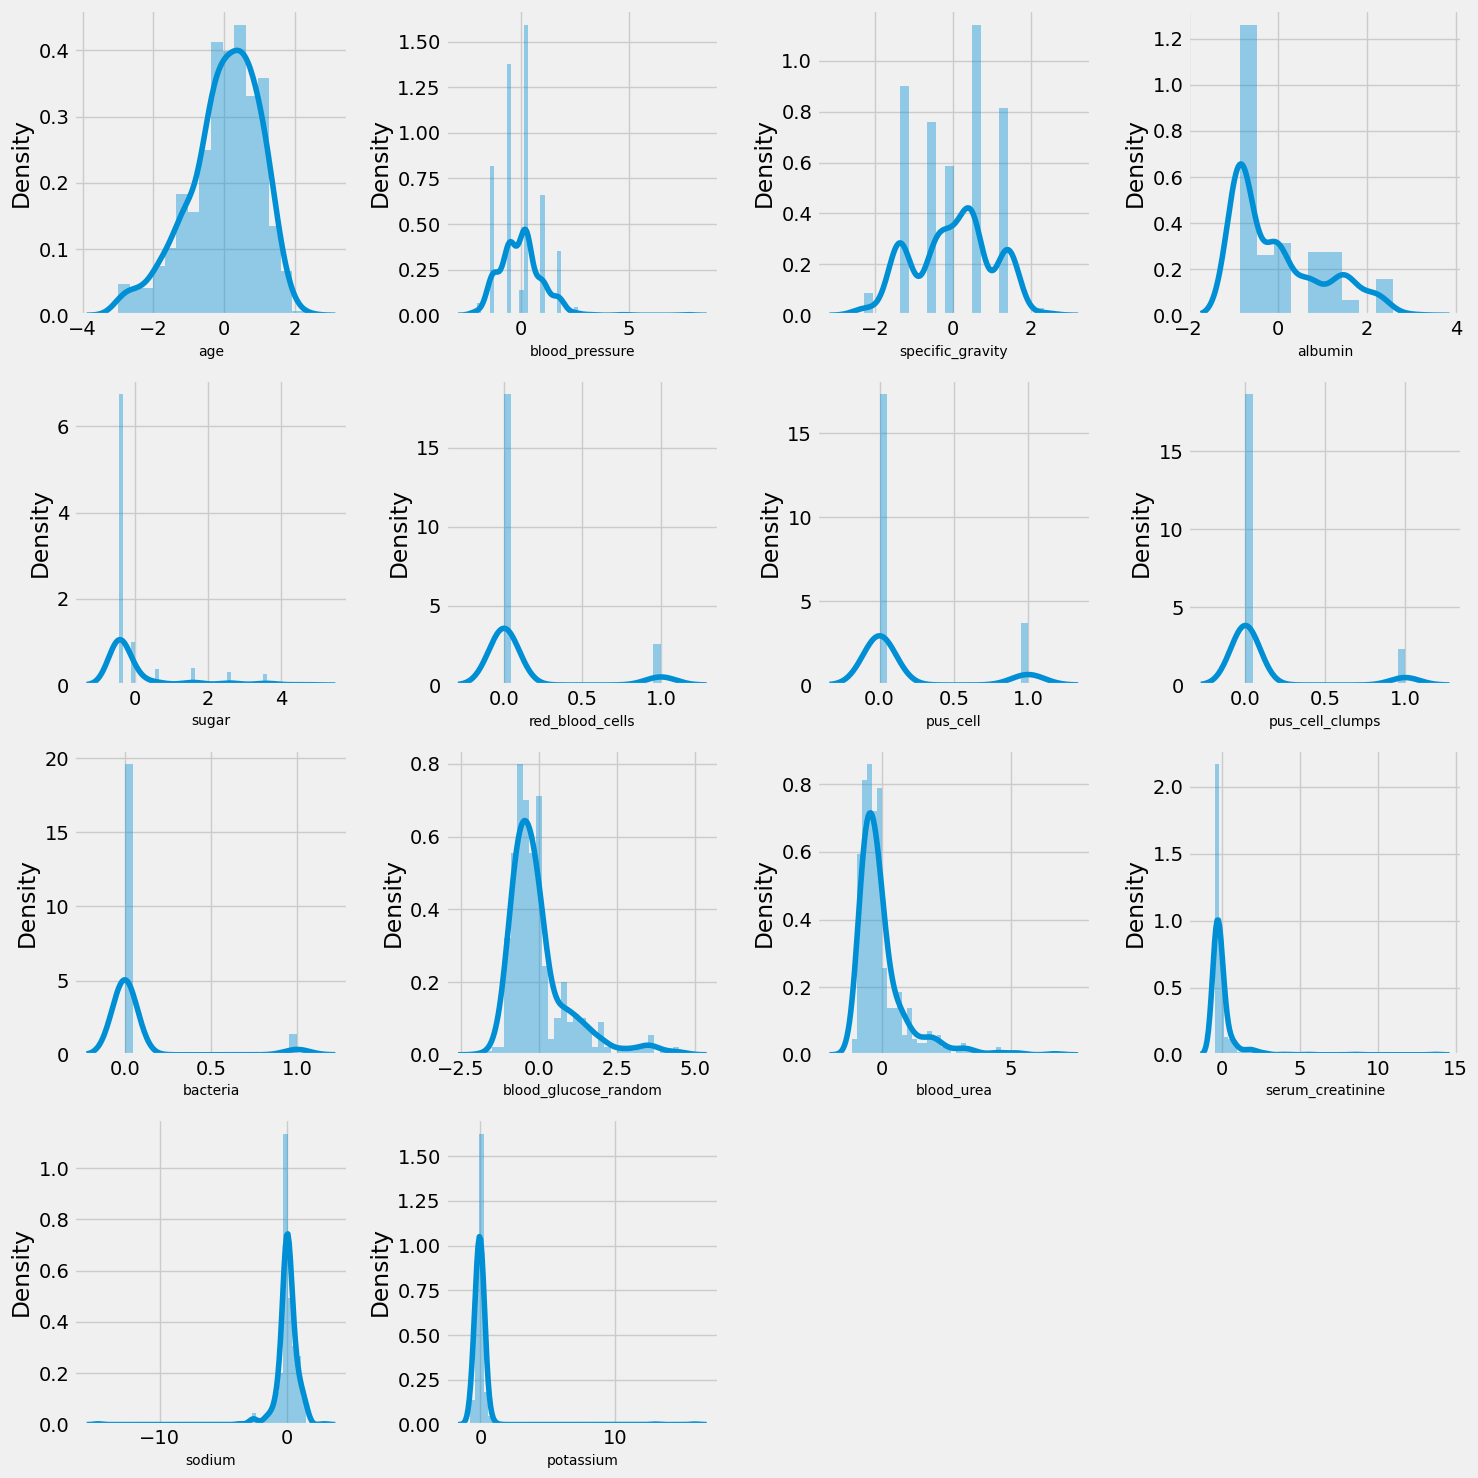

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (15, 15))
plotnumber = 1
num_cols = [col for col in df.columns if df[col].dtype != 'object']

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

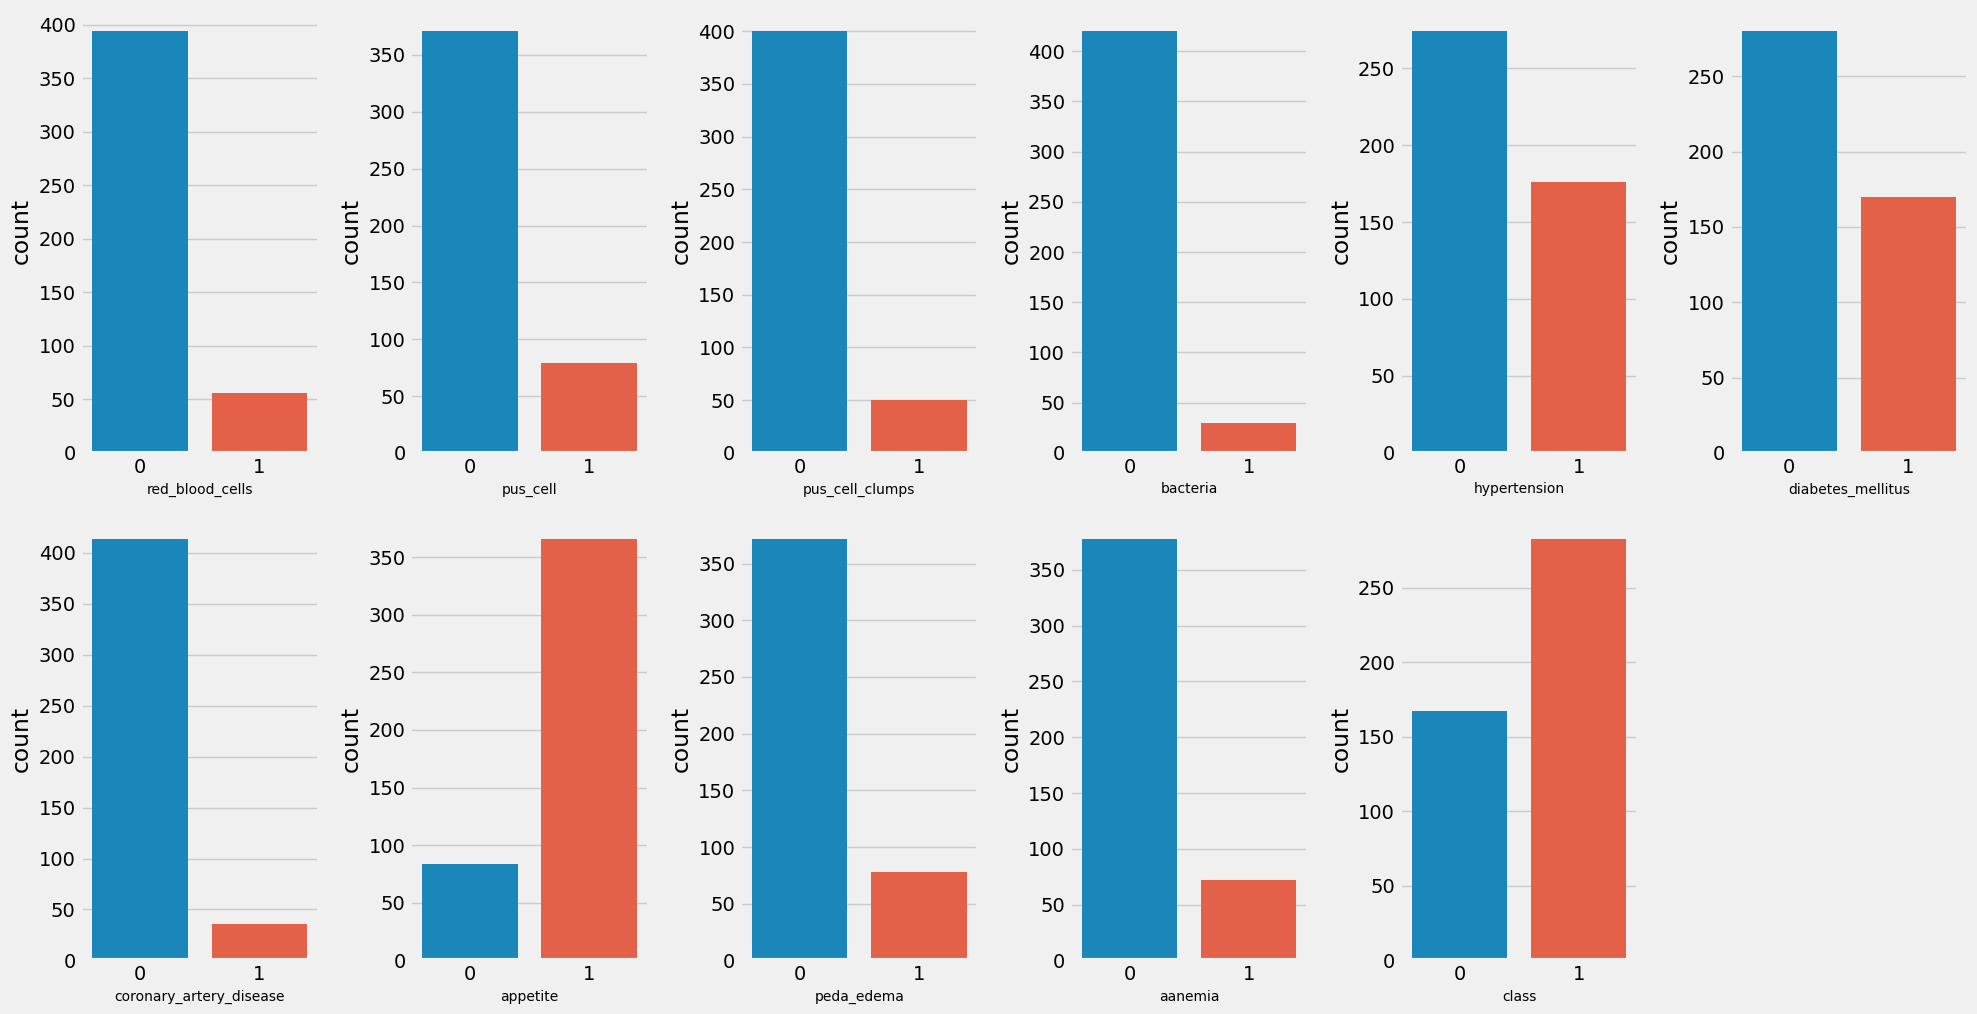

In [ ]:
# Plotting categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 6, plotnumber)
        sns.countplot(x = column, data = df)
        plt.xlabel(column, fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

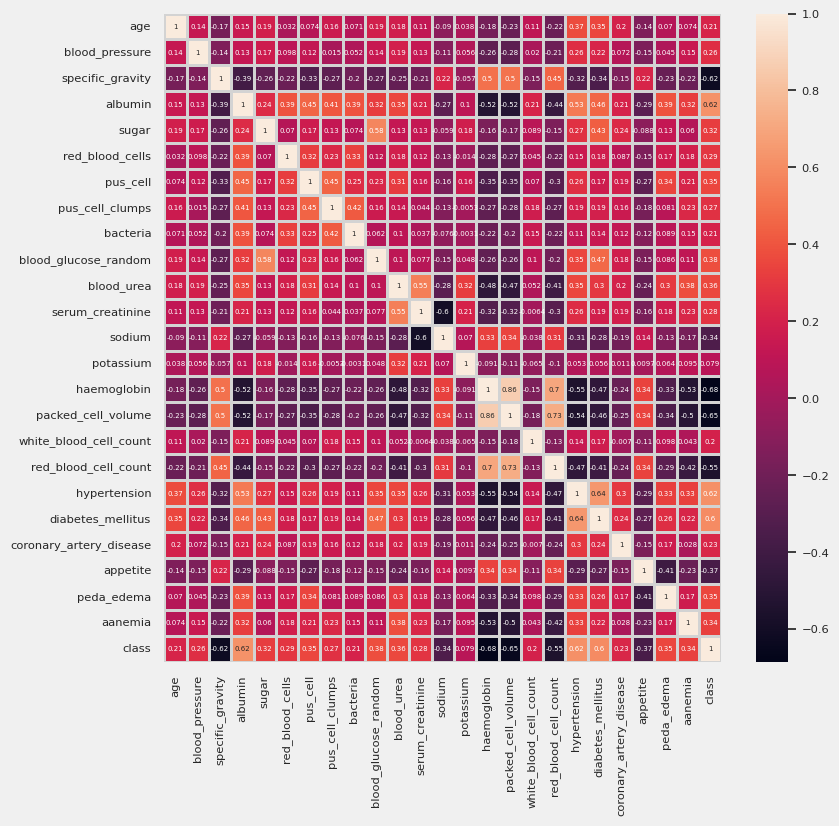

In [ ]:
# heatmap of data

plt.figure(figsize = (8, 8))
sns.set(font_scale=0.75)
sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey', annot_kws={'size': 5})
plt.show()

In [ ]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template='plotly_dark')

    # Set the background color to white
    fig.update_layout(
        plot_bgcolor='white',
    )
    return fig.show()

In [ ]:
violin('haemoglobin')

In [ ]:
scatter('red_blood_cell_count', 'packed_cell_volume')

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class'] but received: viridis

### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
y = df['class']
X = df.drop(['class'], axis = 1)


In [ ]:
df['class'].value_counts()

1    283
0    167
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size=0.30,
                                  stratify=y)

In [ ]:
y_train.value_counts()

1    198
0    117
Name: class, dtype: int64

In [ ]:
X_test.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

###**Data augmentation using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling._smote.base import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm=smt.fit_resample (X_train, y_train)
counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 198, 0: 117})
After Counter({0: 198, 1: 198})


In [ ]:
X_train=X_train_sm
y_train=y_train_sm

##**Feature selection**##

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 10.9 MB/s eta 0:00:00


In [ ]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=00dcf0eb26f8e77c3c78eed6ca8963d14858b7e3011c2f89bf0336e30763aab8
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


###**XGBoost without tuning**###

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Create XGBoost model
model = xgb.XGBClassifier(n_estimators = 10, max_depth = 3, learning_rate = 0.1, subsample = 0.1)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")
print("---------------------------------------------")
print(f"Model Accuracy without tuning: {accuracy}")

age: 0.0
blood_pressure: 0.0
specific_gravity: 0.18832668662071228
albumin: 0.23716196417808533
sugar: 0.0
red_blood_cells: 0.0
pus_cell: 0.0
pus_cell_clumps: 0.0
bacteria: 0.0
blood_glucose_random: 0.0
blood_urea: 0.0
serum_creatinine: 0.15845339000225067
sodium: 0.0
potassium: 0.0
haemoglobin: 0.21646800637245178
packed_cell_volume: 0.19958998262882233
white_blood_cell_count: 0.0
red_blood_cell_count: 0.0
hypertension: 0.0
diabetes_mellitus: 0.0
coronary_artery_disease: 0.0
appetite: 0.0
peda_edema: 0.0
aanemia: 0.0
---------------------------------------------
Model Accuracy without tuning: 0.9111111111111111


###**XGBoost with tuning**###

Stopping search: maximum iterations reached --> 50
Final Model Accuracy after tuning: 0.9851851851851852
---------------------------------------
FINAL OPTIMIZED HYPER PARAMETER VALUES : 
 Learning rate  0.01 
 Max depth  3.1296308304115596 
 child weight  2.254865492392247 
 subsample  0.9414105704209181 
 colsample_bytree 0.7502532480848886 
 n_estimators  34.7618982125313 
 gamma 0.5700834080975816
----------------------------------------
age: 0.0014756121672689915
blood_pressure: 0.0
specific_gravity: 0.0009313014452345669
albumin: 0.10790588706731796
sugar: 0.0
red_blood_cells: 0.0
pus_cell: 0.0
pus_cell_clumps: 0.0
bacteria: 0.0
blood_glucose_random: 0.0
blood_urea: 0.0
serum_creatinine: 0.1439400315284729
sodium: 0.03869820758700371
potassium: 0.0
haemoglobin: 0.24143508076667786
packed_cell_volume: 0.25177210569381714
white_blood_cell_count: 0.0040090144611895084
red_blood_cell_count: 0.0
hypertension: 0.20983271300792694
diabetes_mellitus: 0.0
coronary_artery_disease: 0.0
appet

PermutationExplainer explainer: 397it [00:23,  9.70it/s]


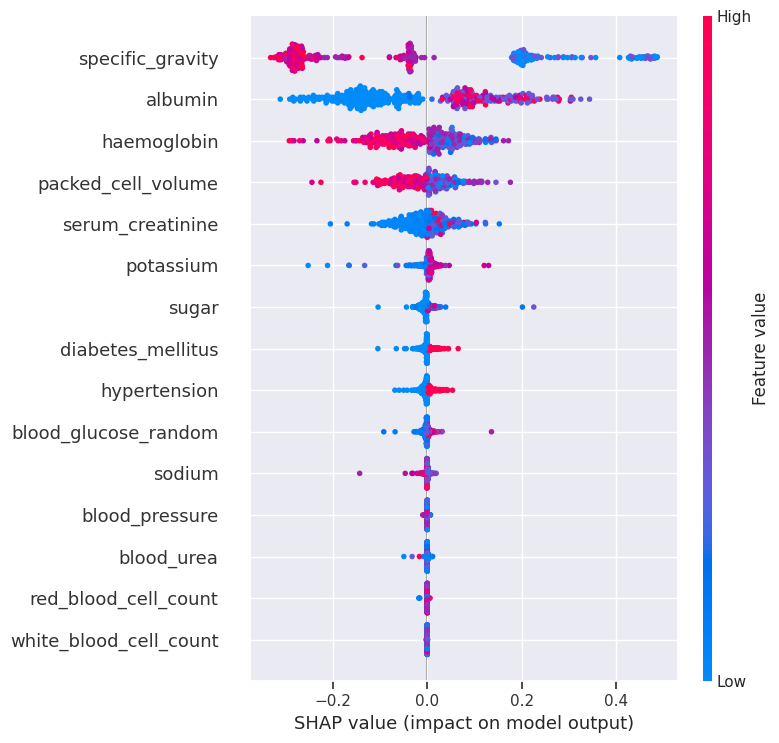

In [ ]:
# Import necessary libraries
import numpy as np
import shap
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from pyswarm import pso
accuracy_arr=[]
estimators=[]

# Define the objective function for PSO
def objective_function(params):
    learning_rate, max_depth, min_child_weight, subsample, colsample_bytree, n_estimators, gamma = params

    # Define XGBoost model with given hyperparameters
    model = XGBClassifier(learning_rate=learning_rate,
                          max_depth=int(max_depth),
                          min_child_weight=int(min_child_weight),
                          subsample=subsample,
                          colsample_bytree=colsample_bytree,
                          n_estimators=int(n_estimators),
                          gamma=gamma)

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy (objective to be minimized)
    accuracy = 1 - accuracy_score(y_test, y_pred)
    accuracy_arr.append(1-accuracy)
    estimators.append(n_estimators)

    return accuracy

# Define parameter bounds for PSO
lb = [0.01, 1, 1, 0.1, 0.1, 10, 0.1]
ub = [0.3, 10, 10, 1, 1, 300, 1]

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=50)

# Extract best hyperparameters
learning_rate, max_depth, min_child_weight, subsample, colsample_bytree, n_estimators, gamma = best_params

# Train the final model with best hyperparameters
final_model = XGBClassifier(learning_rate=learning_rate,
                            max_depth=int(max_depth),
                            min_child_weight=int(min_child_weight),
                            subsample=subsample,
                            colsample_bytree=colsample_bytree,
                            n_estimators=int(n_estimators),
                            gamma=gamma)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy after tuning: {accuracy}")
print("---------------------------------------")
print("FINAL OPTIMIZED HYPER PARAMETER VALUES : \n Learning rate ",learning_rate,"\n",
      "Max depth " ,max_depth, "\n" ,
      "child weight " , min_child_weight , "\n" ,
      "subsample " , subsample , "\n" ,
      "colsample_bytree" , colsample_bytree , "\n" ,
      "n_estimators " , n_estimators , "\n" ,
      "gamma", gamma)
print("----------------------------------------")

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

#shap explainer
explainer = shap.Explainer(final_model.predict, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, max_display=15, show=False)

[10.0, 10.0, 10.0, 10.570463143364691, 13.275962512505956, 15.555321694223714, 18.674633780110074, 19.293287314989797, 23.679845917964162, 23.837368573567275, 26.165406918774494, 28.996677016606434, 29.19239130898982, 29.52914606194938, 29.638093404879875, 29.71090622941271, 29.726523175896578, 30.04859782824363, 30.188356086046415, 30.29691315346927, 30.343821591571395, 30.351376083623947, 30.366505018761302, 30.381766380192413, 30.40670213402906, 30.630802092961257, 30.723189257085014, 30.758139661518644, 30.800514139574545, 30.820143773181915, 31.011302769310056, 31.443166301810933, 31.491277575501595, 31.557674196421512, 31.64299020866627, 31.658131829137158, 31.912419292183657, 31.976689584709675, 32.0177288202584, 32.06331270097012, 32.2359529515291, 32.38671113959537, 32.64137906390262, 32.680097009072355, 32.769879455175975, 32.88283766672352, 32.893067054639126, 32.91442472432925, 33.10395790775, 33.2146414544212, 33.246375126955186, 33.31926884297957, 33.35769988205877, 33.41

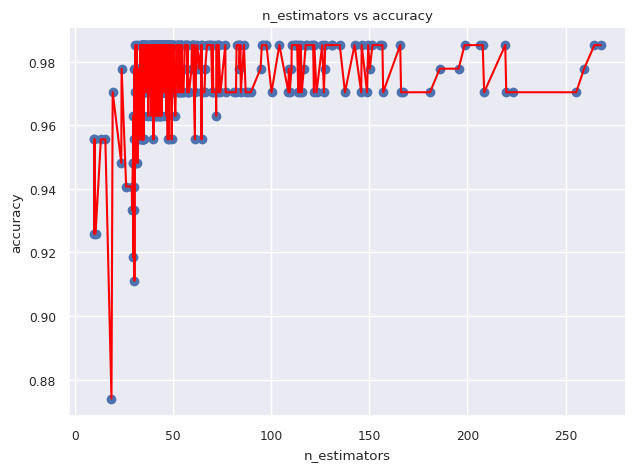

In [ ]:
import matplotlib.pyplot as plt
print(estimators)
print(accuracy_arr)
plt.title("n_estimators vs accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.scatter(estimators, accuracy_arr)
estimators.sort()
plt.plot(estimators, accuracy_arr, color="red")

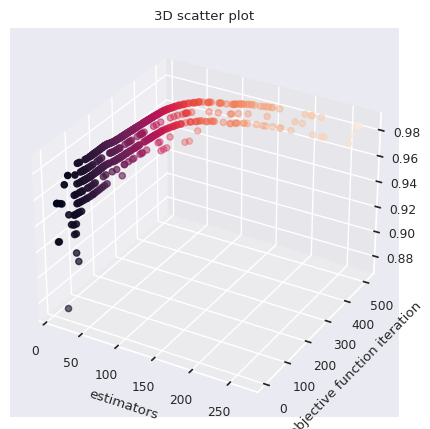

In [ ]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining all 3 axis
y = np.arange(1,511)
x = estimators
z = accuracy_arr

# plotting
c = x + y
ax.scatter(x, y, z, c = c)
ax.set_title('3D scatter plot')
plt.xlabel("estimators")
plt.ylabel("objective function iteration")

plt.show()


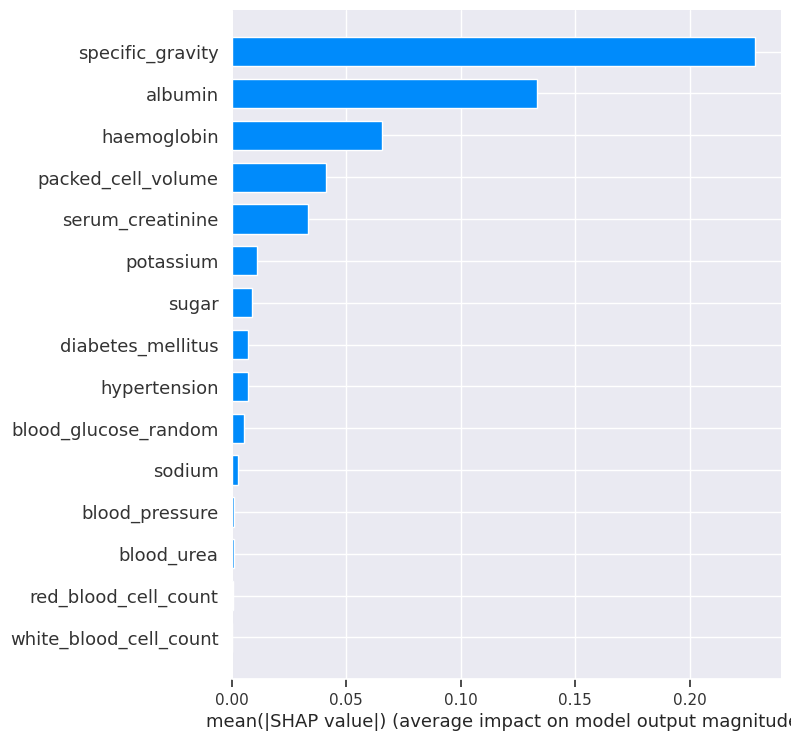

In [ ]:

shap.summary_plot(shap_values, max_display=15, show=False, plot_type='bar')

In [ ]:
feature_importance = pd.DataFrame({'name': X_train.columns, 'importance': shap_values.abs.sum(0).values})
feature_importance= feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
feature_importance[feature_importance['importance']>0]

,name,importance
0,specific_gravity,90.4730
1,albumin,52.7335
2,haemoglobin,25.9260
3,packed_cell_volume,16.3345
4,serum_creatinine,13.2435
5,potassium,4.3295
6,sugar,3.5750
7,diabetes_mellitus,2.8815
8,hypertension,2.8770
9,blood_glucose_random,2.0550


In [ ]:
K=14
# Select the top K important features
top_features = feature_importance.head(K)['name']

# Filter the training data to include only the selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


NameError: ignored

In [ ]:
X_train_selected.head()

,specific_gravity,albumin,haemoglobin,packed_cell_volume,serum_creatinine,potassium,sugar,diabetes_mellitus,hypertension,blood_glucose_random,sodium,blood_pressure,blood_urea,red_blood_cell_count
0,-1.369242e+00,1.443145e+00,0.060934,-0.142950,-0.047299,-0.212429,3.600424e+00,1,1,1.504013,-0.800099,-0.525730,0.589711,-6.160701e-01
1,-4.435639e-01,-8.385374e-01,-1.300115,-1.617157,-0.272580,0.237710,-4.268286e-01,0,1,-0.776767,0.319577,0.225313,-0.417054,-1.675012e+00
2,1.407792e+00,-8.385374e-01,0.392000,0.348452,-0.385221,0.162687,-4.268286e-01,0,0,-0.272874,1.439252,-0.525730,-0.417054,8.989085e-02
3,4.821140e-01,-8.385374e-01,0.649496,0.839854,-0.366447,-0.287453,-4.268286e-01,0,0,-0.259613,1.103349,0.225313,-0.396918,7.958519e-01
4,-4.110836e-14,1.688784e-16,-2.330099,0.000000,1.736178,-0.287453,5.588936e-17,0,1,0.000000,-0.800099,-0.525730,3.247571,1.045032e-15


In [ ]:
X_test_selected.head()

,specific_gravity,albumin,haemoglobin,packed_cell_volume,serum_creatinine,potassium,sugar,diabetes_mellitus,hypertension,blood_glucose_random,sodium,blood_pressure,blood_urea,red_blood_cell_count
359,0.482114,-0.838537,1.274843,0.348452,-0.347674,0.050152,-0.426829,0,0,-0.551341,0.431544,-1.276773,-6.586771e-01,6.781917e-01
19,2.333470,1.747369,-0.454058,0.000000,-0.402117,-0.328716,-0.426829,1,1,-0.538080,-0.912066,0.976356,1.430699e-16,-3.219197e-01
263,-1.369242,0.682584,0.000000,0.000000,-0.235033,-0.099894,-0.426829,1,1,0.549268,-0.800099,-1.276773,-8.197595e-01,1.045032e-15
428,0.482114,-0.838537,1.238058,1.085555,-0.460314,0.125175,-0.426829,0,0,-0.140270,1.439252,0.225313,-1.754300e-01,3.252112e-01
27,1.407792,1.595257,1.127703,0.508158,-0.263193,-0.148660,2.593611,1,1,0.774694,-0.464196,-0.525730,-4.170535e-01,2.546151e-01


In [ ]:
top_features=["specific_gravity","albumin","haemoglobin","packed_cell_volume","serum_creatinine","potassium","sugar","diabetes_mellitus","hypertension","blood_glucose_random",
              "sodium","blood_pressure","blood_urea","red_blood_cell_count","white_blood_cell_count"]

X_test_selected=X_test[top_features]
X_train_selected=X_train[top_features]

X_train_selected.head(10)

,specific_gravity,albumin,haemoglobin,packed_cell_volume,serum_creatinine,potassium,sugar,diabetes_mellitus,hypertension,blood_glucose_random,sodium,blood_pressure,blood_urea,red_blood_cell_count,white_blood_cell_count
0,4.821140e-01,-8.385374e-01,0.870207,0.717003,-0.403994,1.626871e-01,-0.426829,0,0,-0.922630,0.879414,-0.525730,-7.996242e-01,1.619473e+00,0.427644
1,-1.369242e+00,-7.797668e-02,0.000000,0.000000,-0.366447,-2.124295e-01,2.593611,1,0,0.827735,0.207609,1.727398,-6.989477e-01,1.045032e-15,0.000000
2,-4.435639e-01,2.203706e+00,-1.851892,-2.231409,1.848819,4.252687e-01,1.586798,1,1,1.384669,-0.240261,1.727398,1.495800e+00,-8.513905e-01,0.427644
3,-4.110836e-14,1.688784e-16,-0.270132,-0.314941,-0.250052,-1.361768e-02,-0.426829,1,1,-0.339175,-0.352229,1.727398,4.455689e+00,-4.513459e-01,-0.024337
4,-1.369242e+00,1.443145e+00,-0.858694,-0.757203,0.271850,3.127338e-01,2.593611,1,1,1.901823,-1.024034,0.225313,2.675466e-01,-8.513905e-01,0.149501
5,-4.435639e-01,-7.797668e-02,-0.748338,-0.757203,-0.216260,-2.499411e-01,-0.426829,0,1,-0.776767,-0.464196,-0.525730,-5.781359e-01,1.045032e-15,0.000000
6,-4.435639e-01,6.825841e-01,0.024149,0.717003,-0.347674,-3.331705e-16,3.600424,1,0,3.440023,0.000000,0.000000,-5.378653e-01,4.428714e-01,-0.580622
7,4.821140e-01,-8.385374e-01,0.465570,0.717003,-0.460314,-3.999878e-01,-0.426829,0,0,-0.180051,1.439252,-1.276773,-8.197595e-01,-1.454295e-01,-0.232944
8,4.821140e-01,1.595257e+00,-1.410471,-1.457451,-0.251929,1.439313e-01,-0.426829,1,1,0.191239,-0.128294,0.225313,-4.774594e-01,8.989085e-02,1.679283
9,1.407792e+00,-8.385374e-01,0.612711,0.348452,0.000000,5.015214e-02,-0.426829,0,0,0.000000,-0.016326,-1.276773,1.430699e-16,1.031172e+00,-1.415048


----
##**Logistic Regression**

In [ ]:
#With selected features
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LogisticRegression
clf = LogisticRegression(max_iter=2, random_state=0)
clf.fit(X_train_selected, y_train)

# Prediction
y_pred = clf.predict(X_test_selected)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)


Logistic Regression model accuracy (in %): 91.85185185185185


Accuracy: 91.85185185185185
Precision: 0.9868421052631579
Recall: 0.8823529411764706
Specificity: 98.0
F1 Score: 93.16770186335403






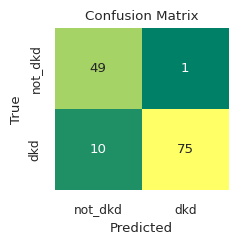

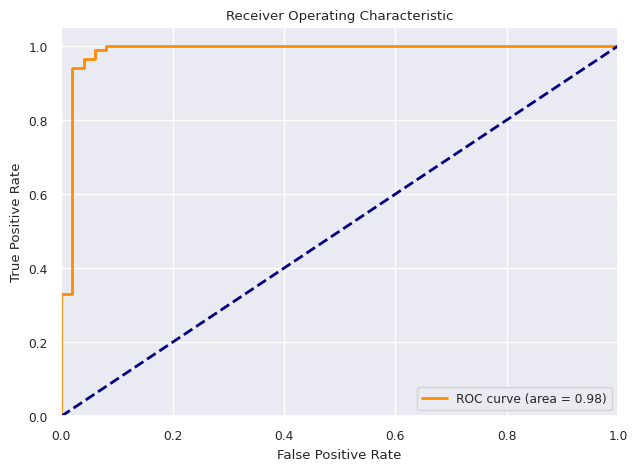

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="summer", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# With all features
# import the necessary libraries


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# LogisticRegression
clf = LogisticRegression(max_iter=2,random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)



Logistic Regression model accuracy (in %): 91.85185185185185


Accuracy: 91.85185185185185
Precision: 0.9868421052631579
Recall: 0.8823529411764706
Specificity: 98.0
F1 Score: 93.16770186335403






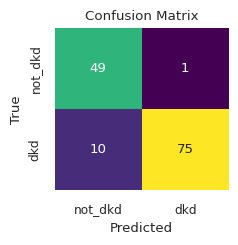

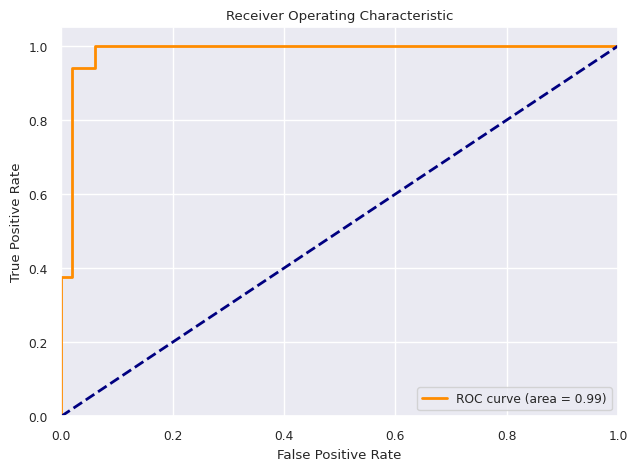

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

####Firefly optimization for logistic regression####

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the objective function for Firefly Optimization
def logistic_regression_objective_function(max_iter):
    max_iter = int(max_iter)

    # Initialize the Logistic Regression model
    log_reg_model = LogisticRegression(max_iter=max_iter, random_state=42)

    # Train the Logistic Regression model
    log_reg_model.fit(X_train_selected, y_train)

    # Evaluate the accuracy on the validation set
    accuracy = accuracy_score(y_test, log_reg_model.predict(X_test_selected))

    # Minimize the negative accuracy to maximize accuracy
    return -accuracy

# Define the Firefly Optimization parameters
n_fireflies = 20
n_iterations = 30
alpha = 0.5  # Attraction coefficient
beta_min = 0.02  # Minimum value for beta
gamma = 1.0  # Light absorption coefficient
lower_bound = 1  # Lower bound for max_iter
upper_bound = 100  # Upper bound for max_iter

# Initialize the fireflies with random solutions
fireflies = np.random.uniform(lower_bound, upper_bound, n_fireflies)

# Perform Firefly Optimization
for iteration in range(n_iterations):
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if logistic_regression_objective_function(fireflies[j]) > logistic_regression_objective_function(fireflies[i]):
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta_min + (1.0 - beta_min) * np.exp(-gamma * distance ** 2)
                fireflies[i] += alpha * (fireflies[j] - fireflies[i]) * beta
    # Update the fireflies' positions based on their attractiveness

# Find the best solution
best_max_iter = int(min(fireflies, key=logistic_regression_objective_function))

# Initialize the Logistic Regression model with the best max_iter
best_log_reg_model = LogisticRegression(max_iter=best_max_iter, random_state=42)

# Train the Logistic Regression model on the full training set
best_log_reg_model.fit(X_train_selected, y_train)

# Evaluate the final Logistic Regression model on the test set
test_accuracy = accuracy_score(y_test, best_log_reg_model.predict(X_test_selected))
print(f"Best max_iter: {best_max_iter}")
print(f"Test Accuracy: {test_accuracy*100}")


Best max_iter: 91
Test Accuracy: 94.81481481481482


####Ant colony optimization for Logistic Regression####


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the objective function to evaluate performance
def evaluate(num_estimators):
    # Create a LogisticRegression model with 'num_estimators' as max_iter
    clf = LogisticRegression(max_iter=num_estimators, random_state=0)

    # Evaluate performance using cross-validation (replace with your dataset and metric)
    scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring='accuracy')

    # Return the mean performance score
    return np.mean(scores)

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 20
pheromone_evaporation = 0.01
pheromone_deposit = 0.005
min_estimators = 1
max_estimators = 200

# Initialize pheromone levels
pheromones = np.ones(max_estimators - min_estimators + 1)

# ACO optimization loop
for iteration in range(num_iterations):
    # Create a list to store solutions
    solutions = []

    # Deploy ants to find solutions
    for ant in range(num_ants):
        # Choose a number of estimators probabilistically based on pheromone levels
        selected_estimators = np.random.choice(np.arange(min_estimators, max_estimators + 1), p=pheromones / np.sum(pheromones))

        # Evaluate the selected solution
        solution_quality = evaluate(selected_estimators)

        solutions.append((selected_estimators, solution_quality))

    # Update pheromone levels based on ant solutions
    for i in range(max_estimators - min_estimators + 1):
        pheromones[i] *= (1 - pheromone_evaporation)

    for solution in solutions:
        num_estimators, solution_quality = solution
        index = num_estimators - min_estimators
        pheromones[index] += pheromone_deposit / solution_quality

# Select the best solution found by ACO
best_solution = max(solutions, key=lambda x: x[1])
best_estimators, best_quality = best_solution

print("Best number of estimators (max_iter):", best_estimators)
print("Best quality (accuracy):", best_quality)

# Train the final LogisticRegression model with the best number of estimators (max_iter)
final_logistic_regression = LogisticRegression(max_iter=best_estimators, random_state=0)
final_logistic_regression.fit(X_train_selected, y_train)

test_accuracy = accuracy_score(y_test, final_logistic_regression.predict(X_test_selected))
print(f"Test Accuracy: {test_accuracy*100}")


Best number of estimators (max_iter): 122
Best quality (accuracy): 0.9682539682539684
Test Accuracy: 94.81481481481482


----
##**Bagging Tree Model**

In [ ]:

#using selected features
#Step 1: Import the model you want to use
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#Step 2: Make an instance of the Model
reg = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=20,
                       random_state = 0)

#Step 3: Training the model on the data, storing the information learned from the data
reg.fit(X_train_selected, y_train)

#Step 4: Make Predictions
# Returns a NumPy Array
y_pred = reg.predict(X_test_selected)


#Measuring Model Performance
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of Bagging Tree Model : {acc:.3f}')


Accuracy of Bagging Tree Model : 0.963


Accuracy: 96.29629629629629
Precision: 0.9878048780487805
Recall: 0.9529411764705882
Specificity: 98.0
F1 Score: 97.0059880239521






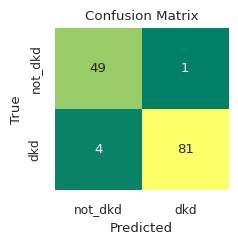

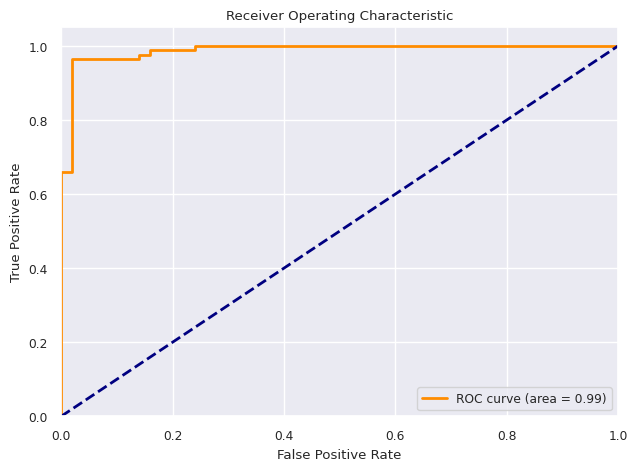

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="summer", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

###FireFly optimization for Bagging Tree Model###

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the objective function for Firefly Optimization
def bagging_objective_function(n_estimators):
    n_estimators = int(n_estimators)

    # Initialize the BaggingClassifier
    bagging_classifier = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=n_estimators
    )

    # Train the BaggingClassifier
    bagging_classifier.fit(X_train_selected, y_train)

    # Evaluate the accuracy on the validation set
    accuracy = accuracy_score(y_test, bagging_classifier.predict(X_test_selected))

    # Minimize the negative accuracy to maximize accuracy
    return -accuracy

# Define the Firefly Optimization parameters
n_fireflies = 20
n_iterations = 30
alpha = 1.0  # Attraction coefficient
beta_min = 0.2  # Minimum value for beta
gamma = 1.0  # Light absorption coefficient
lower_bound = 1  # Lower bound for n_estimators
upper_bound = 100  # Upper bound for n_estimators

# Initialize the fireflies with random solutions
fireflies = np.random.uniform(lower_bound, upper_bound, n_fireflies)

# Perform Firefly Optimization
for iteration in range(n_iterations):
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if bagging_objective_function(fireflies[j]) > bagging_objective_function(fireflies[i]):
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta_min + (1.0 - beta_min) * np.exp(-gamma * distance ** 2)
                fireflies[i] += alpha * (fireflies[j] - fireflies[i]) * beta
    # Update the fireflies' positions based on their attractiveness

# Find the best solution
best_n_estimators = int(min(fireflies, key=bagging_objective_function))

# Initialize the BaggingClassifier with the best n_estimators
best_bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=best_n_estimators
)

# Train the BaggingClassifier on the full training set
best_bagging_classifier.fit(X_train_selected, y_train)

# Evaluate the final BaggingClassifier on the test set
test_accuracy = accuracy_score(y_test, best_bagging_classifier.predict(X_test_selected))
print(f"Best n_estimators: {best_n_estimators}")
print(f"Test Accuracy: {test_accuracy}")


Best n_estimators: 6
Test Accuracy: 0.9703703703703703


####Ant Colony Optimization for BTM####

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the objective function to evaluate performance
def evaluate(num_estimators):
    # Create a BaggingClassifier with 'num_estimators' base estimators
    base_estimator = DecisionTreeClassifier()  # Replace with your base classifier
    clf = BaggingClassifier(base_estimator, n_estimators=num_estimators)

    # Evaluate performance using cross-validation (replace with your dataset and metric)
    scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring='accuracy')

    # Return the mean performance score
    return np.mean(scores)

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 20
pheromone_evaporation = 0.1
pheromone_deposit = 1.0
min_estimators = 5
max_estimators = 200

# Initialize pheromone levels
pheromones = np.ones(max_estimators - min_estimators + 1)

# ACO optimization loop
for iteration in range(num_iterations):
    # Create a list to store solutions
    solutions = []

    # Deploy ants to find solutions
    for ant in range(num_ants):
        # Choose a number of estimators probabilistically based on pheromone levels
        selected_estimators = np.random.choice(np.arange(min_estimators, max_estimators + 1), p=pheromones / np.sum(pheromones))

        # Evaluate the selected solution
        solution_quality = evaluate(selected_estimators)

        solutions.append((selected_estimators, solution_quality))

    # Update pheromone levels based on ant solutions
    for i in range(max_estimators - min_estimators + 1):
        pheromones[i] *= (1 - pheromone_evaporation)

    for solution in solutions:
        num_estimators, solution_quality = solution
        index = num_estimators - min_estimators
        pheromones[index] += pheromone_deposit / solution_quality

# Select the best solution found by ACO
best_solution = max(solutions, key=lambda x: x[1])
best_estimators, best_quality = best_solution

print("Best number of estimators:", best_estimators)
print("Best quality:", best_quality)

# Train the final BaggingClassifier with the best number of estimators
final_base_estimator = DecisionTreeClassifier()  # Replace with your base classifier
final_bagging = BaggingClassifier(base_estimator=final_base_estimator, n_estimators=best_estimators)
final_bagging.fit(X_train_selected, y_train)

test_accuracy = accuracy_score(y_test, final_bagging.predict(X_test_selected))
print(f"Test Accuracy: {test_accuracy}")


Best number of estimators: 129
Best quality: 0.9696835443037974
Test Accuracy: 0.9703703703703703


In [ ]:
#Using all features
reg = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=20,
                       random_state = 0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of Bagging Tree Model : {acc:.3f}')


Accuracy of Bagging Tree Model : 0.956


Accuracy: 95.55555555555556
Precision: 0.9876543209876543
Recall: 0.9411764705882353
Specificity: 98.0
F1 Score: 96.3855421686747






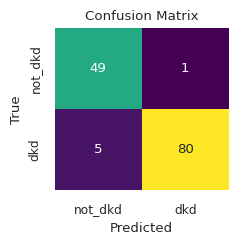

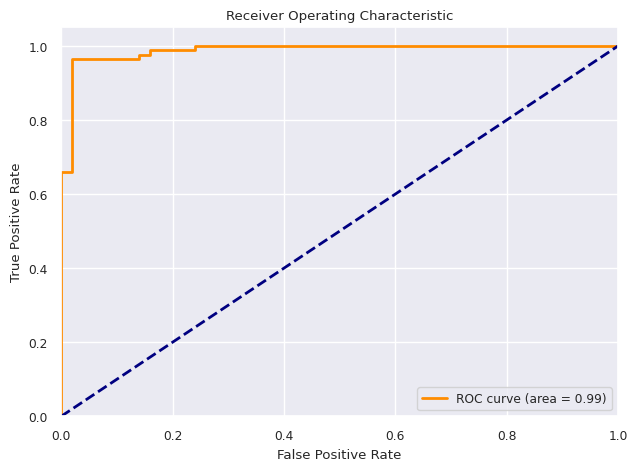

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

----
##**Random Tree / Decision Tree**

###Using entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_entropy.fit(X_train_selected, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5416666666666666, 0.875, 'x[1] <= -0.11\nentropy = 1.0\nsamples = 396\nvalue = [198, 198]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= -0.308\nentropy = 0.635\nsamples = 231\nvalue = [194, 37]'),
 Text(0.16666666666666666, 0.375, 'x[14] <= 0.683\nentropy = 0.639\nsamples = 37\nvalue = [6, 31]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.353\nsamples = 30\nvalue = [2, 28]'),
 Text(0.25, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.375, 'x[2] <= 0.161\nentropy = 0.199\nsamples = 194\nvalue = [188, 6]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 167\nvalue = [167, 0]'),
 Text(0.75, 0.625, 'x[3] <= 0.551\nentropy = 0.165\nsamples = 165\nvalue = [4, 161]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 157\nvalue = [0, 157]'),
 Text(0.8333333333333334, 0.375, 'x[10] <= 0.16\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.75, 0.125, 'en

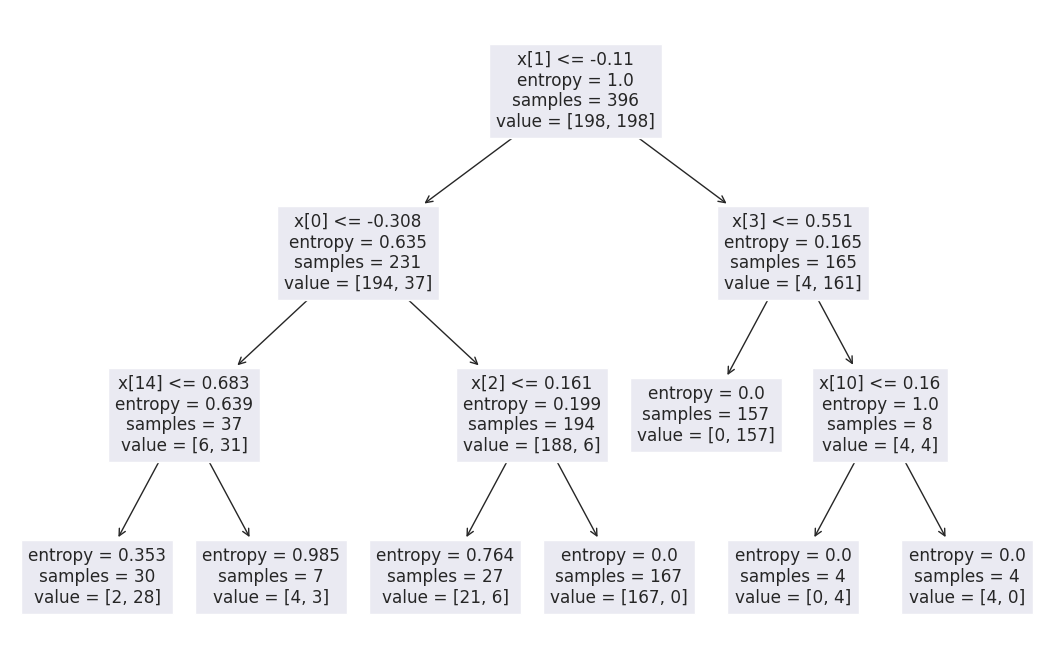

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train_selected, y_train))

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test_selected)

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.9481


Accuracy: 94.81481481481482
Precision: 0.9875
Recall: 0.9294117647058824
Specificity: 98.0
F1 Score: 96.3855421686747






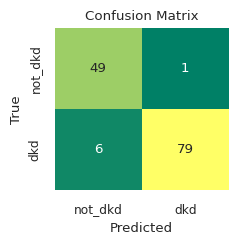

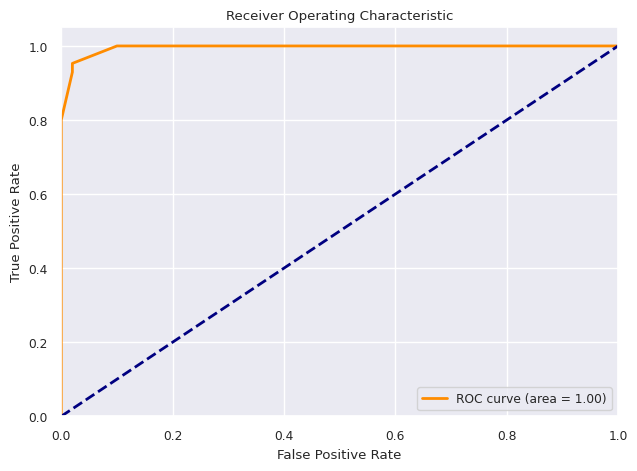

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred_entropy)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_entropy)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_entropy).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred_entropy)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="summer", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf_entropy.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

####Firefly optimization for Random Trees####

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the objective function
def objective_function(params):
    # Unpack hyperparameters
    max_depth, min_samples_split, min_samples_leaf = params

    # Define Decision Tree model with given hyperparameters
    model = DecisionTreeClassifier(max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=42)

    # Train and predict
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy (objective to be maximized)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Firefly Algorithm parameters
num_fireflies = 10
max_generations = 50
alpha = 0.01  # Light absorption coefficient
beta_0 = 1.0  # Attraction coefficient at the start
gamma = 0.1  # Scaling factor for attractiveness

# Define the valid range for hyperparameters
max_depth_bounds = (1, 10)
min_samples_split_bounds = (2, 20)
min_samples_leaf_bounds = (1, 10)

# Initialize the positions of fireflies within the valid bounds
fireflies = np.random.rand(num_fireflies, 3)
fireflies[:, 0] = max_depth_bounds[0] + fireflies[:, 0] * (max_depth_bounds[1] - max_depth_bounds[0])
fireflies[:, 1] = min_samples_split_bounds[0] + fireflies[:, 1] * (min_samples_split_bounds[1] - min_samples_split_bounds[0])
fireflies[:, 2] = min_samples_leaf_bounds[0] + fireflies[:, 2] * (min_samples_leaf_bounds[1] - min_samples_leaf_bounds[0])

for generation in range(max_generations):
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if objective_function(fireflies[i]) < objective_function(fireflies[j]):
                # Update the position of firefly i based on firefly j
                r = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta_0 * np.exp(-gamma * r**2)
                fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(3) - 0.5)

# Find the best solution (firefly with the highest brightness)
best_firefly = max(fireflies, key=objective_function)
best_max_depth, best_min_samples_split, best_min_samples_leaf = best_firefly

# Train the final Decision Tree model with the best hyperparameters
final_decision_tree = DecisionTreeClassifier(max_depth=int(best_max_depth),
                                             min_samples_split=int(best_min_samples_split),
                                             min_samples_leaf=int(best_min_samples_leaf),
                                             random_state=42)
final_decision_tree.fit(X_train_selected, y_train)

# Evaluate on the test set
y_pred_final = final_decision_tree.predict(X_test_selected)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Decision Tree Model Accuracy after tuning: {accuracy_final}")


Final Decision Tree Model Accuracy after tuning: 0.9629629629629629


####Ant Colony optimization for Random Trees####

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the objective function
def objective_function(params):
    # Unpack hyperparameters
    max_depth, min_samples_split, min_samples_leaf = params

    # Define Decision Tree model with given hyperparameters
    model = DecisionTreeClassifier(max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=0)

    # Train and predict
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy (objective to be maximized)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 100
pheromone_decay = 0.01
pheromone_deposit = 0.5

# Define the valid range for hyperparameters
max_depth_bounds = (1, 10)
min_samples_split_bounds = (2, 20)
min_samples_leaf_bounds = (1, 10)

# Initialize pheromone levels
pheromones = np.ones((num_ants, 3))

for iteration in range(num_iterations):
    for ant in range(num_ants):
        # Calculate the number of choices for each hyperparameter
        num_max_depth_choices = max_depth_bounds[1] - max_depth_bounds[0] + 1
        num_min_samples_split_choices = min_samples_split_bounds[1] - min_samples_split_bounds[0] + 1
        num_min_samples_leaf_choices = min_samples_leaf_bounds[1] - min_samples_leaf_bounds[0] + 1

        max_depth_choices = np.arange(max_depth_bounds[0], max_depth_bounds[1] + 1)
        min_samples_split_choices = np.arange(min_samples_split_bounds[0], min_samples_split_bounds[1] + 1)
        min_samples_leaf_choices = np.arange(min_samples_leaf_bounds[0], min_samples_leaf_bounds[1] + 1)

        max_depth = np.random.choice(max_depth_choices)
        min_samples_split = np.random.choice(min_samples_split_choices)
        min_samples_leaf = np.random.choice(min_samples_leaf_choices)

        # Evaluate the objective function
        accuracy = objective_function((max_depth, min_samples_split, min_samples_leaf))

        # Deposit pheromone based on the objective function
        pheromones[ant] += pheromone_deposit * accuracy

    # Decay pheromone levels
    pheromones *= (1 - pheromone_decay)

# Find the best solution (ant with the highest accuracy)
best_ant = np.argmax([objective_function((max_depth, min_samples_split, min_samples_leaf))
                      for (max_depth, min_samples_split, min_samples_leaf)
                      in zip(pheromones[:, 0], pheromones[:, 1], pheromones[:, 2])])

best_max_depth, best_min_samples_split, best_min_samples_leaf = pheromones[best_ant]
print(f"Best hyperparameters for Decision Tree : {int(best_max_depth)}, {int(best_min_samples_split)}, {int(best_min_samples_leaf)}")
# Train the final Decision Tree model with the best hyperparameters
final_decision_tree = DecisionTreeClassifier(max_depth=int(best_max_depth),
                                             min_samples_split=int(best_min_samples_split),
                                             min_samples_leaf=int(best_min_samples_leaf),
                                             random_state=42)
final_decision_tree.fit(X_train_selected, y_train)

# Evaluate on the test set
y_pred_final = final_decision_tree.predict(X_test_selected)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Decision Tree Model Accuracy after tuning: {accuracy_final}")


Best hyperparameters for Decision Tree : 29, 29, 29
Final Decision Tree Model Accuracy after tuning: 0.9555555555555556


In [ ]:
##Using entropy with all features
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5416666666666666, 0.875, 'x[3] <= -0.11\nentropy = 1.0\nsamples = 396\nvalue = [198, 198]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= -0.308\nentropy = 0.635\nsamples = 231\nvalue = [194, 37]'),
 Text(0.16666666666666666, 0.375, 'x[16] <= 0.683\nentropy = 0.639\nsamples = 37\nvalue = [6, 31]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.353\nsamples = 30\nvalue = [2, 28]'),
 Text(0.25, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.375, 'x[14] <= 0.161\nentropy = 0.199\nsamples = 194\nvalue = [188, 6]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 167\nvalue = [167, 0]'),
 Text(0.75, 0.625, 'x[15] <= 0.551\nentropy = 0.165\nsamples = 165\nvalue = [4, 161]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 157\nvalue = [0, 157]'),
 Text(0.8333333333333334, 0.375, 'x[12] <= 0.16\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.75, 0.125, '

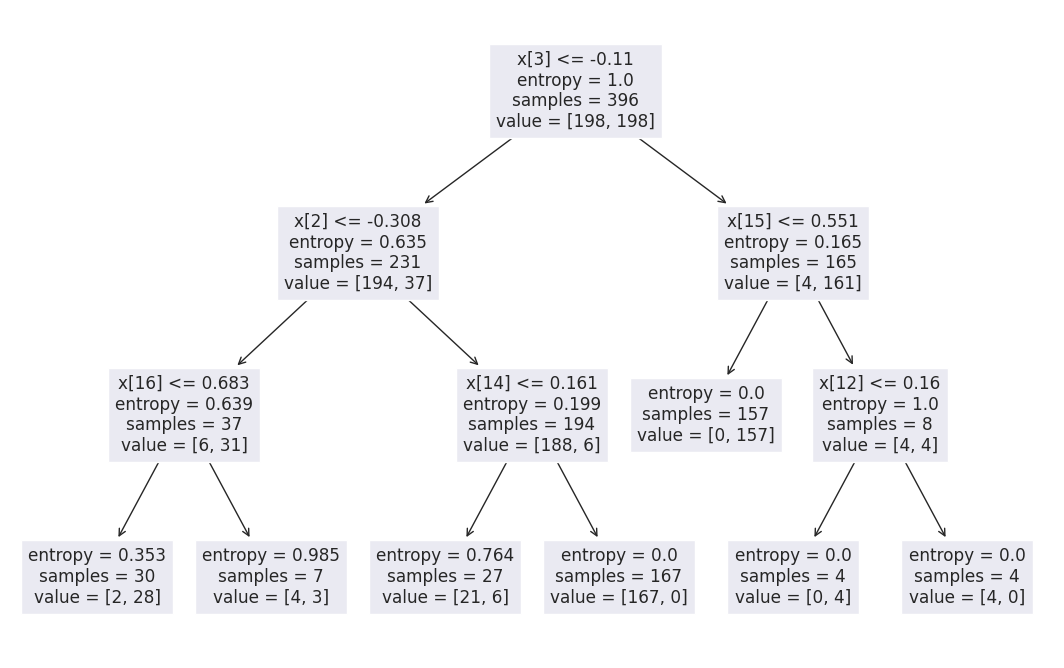

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train))

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test)


In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.9481


Accuracy: 94.81481481481482
Precision: 0.9875
Recall: 0.9294117647058824
Specificity: 98.0
F1 Score: 95.75757575757576






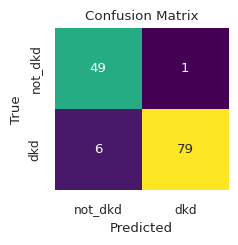

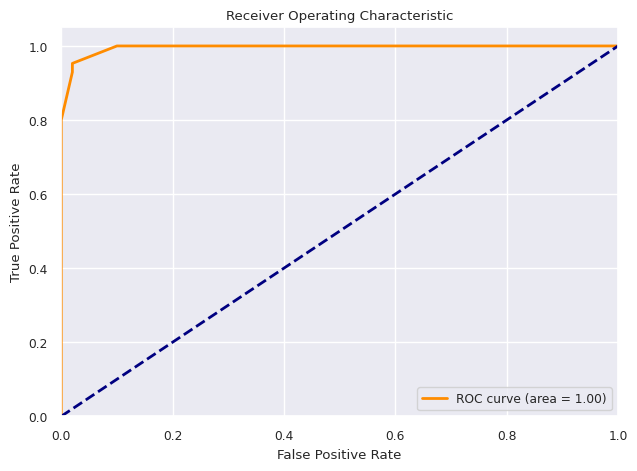

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred_entropy)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_entropy)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_entropy).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred_entropy)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred_entropy)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf_entropy.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

----
##**Random Forest**

In [ ]:
#Using selected features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
rf_classifier.fit(X_train_selected, y_train)
y_pred = rf_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 94.81%


Accuracy: 94.81481481481482
Precision: 0.9534883720930233
Recall: 0.9647058823529412
Specificity: 92.0
F1 Score: 95.90643274853802






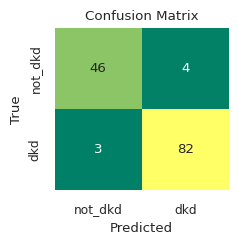

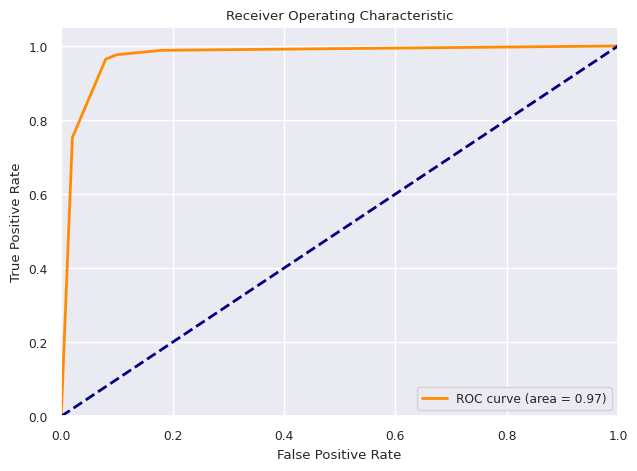

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="summer", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

####FireFly optimization for Random Forest####

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the objective function for Firefly Optimization
def objective_function(n_estimators):
    n_estimators = int(n_estimators)

    # Initialize the BaggingClassifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the BaggingClassifier
    rf_classifier.fit(X_train_selected, y_train)

    # Evaluate the accuracy on the validation set
    accuracy = accuracy_score(y_test, rf_classifier.predict(X_test_selected))

    # Minimize the negative accuracy to maximize accuracy
    return -accuracy

# Define the Firefly Optimization parameters
n_fireflies = 20
n_iterations = 30
alpha = 1.0  # Attraction coefficient
beta_min = 0.02  # Minimum value for beta
gamma = 1.0  # Light absorption coefficient
lower_bound = 1  # Lower bound for n_estimators
upper_bound = 100  # Upper bound for n_estimators

# Initialize the fireflies with random solutions
fireflies = np.random.uniform(lower_bound, upper_bound, n_fireflies)

# Perform Firefly Optimization
for iteration in range(n_iterations):
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if objective_function(fireflies[j]) > objective_function(fireflies[i]):
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta_min + (1.0 - beta_min) * np.exp(-gamma * distance ** 2)
                fireflies[i] += alpha * (fireflies[j] - fireflies[i]) * beta
    # Update the fireflies' positions based on their attractiveness

# Find the best solution
best_n_estimators = int(min(fireflies, key=objective_function))

# Initialize the BaggingClassifier with the best n_estimators
final_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Train the BaggingClassifier on the full training set
final_rf_classifier.fit(X_train_selected, y_train)

# Evaluate the final BaggingClassifier on the test set
test_accuracy = accuracy_score(y_test, final_rf_classifier.predict(X_test_selected))
print(f"Best n_estimators: {best_n_estimators}")
print(f"Test Accuracy: {test_accuracy}")


Best n_estimators: 25
Test Accuracy: 0.9555555555555556


####Ant Colony Optimization for Random Forest####

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the objective function to evaluate performance
def evaluate(num_estimators):
    # Create a BaggingClassifier with 'num_estimators' base estimators
    clf = RandomForestClassifier(n_estimators=num_estimators)

    # Evaluate performance using cross-validation (replace with your dataset and metric)
    scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring='accuracy')

    # Return the mean performance score
    return np.mean(scores)

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 20
pheromone_evaporation = 0.1
pheromone_deposit = 1.0
min_estimators = 5
max_estimators = 200

# Initialize pheromone levels
pheromones = np.ones(max_estimators - min_estimators + 1)

# ACO optimization loop
for iteration in range(num_iterations):
    # Create a list to store solutions
    solutions = []

    # Deploy ants to find solutions
    for ant in range(num_ants):
        # Choose a number of estimators probabilistically based on pheromone levels
        selected_estimators = np.random.choice(np.arange(min_estimators, max_estimators + 1), p=pheromones / np.sum(pheromones))

        # Evaluate the selected solution
        solution_quality = evaluate(selected_estimators)

        solutions.append((selected_estimators, solution_quality))

    # Update pheromone levels based on ant solutions
    for i in range(max_estimators - min_estimators + 1):
        pheromones[i] *= (1 - pheromone_evaporation)

    for solution in solutions:
        num_estimators, solution_quality = solution
        index = num_estimators - min_estimators
        pheromones[index] += pheromone_deposit / solution_quality

# Select the best solution found by ACO
best_solution = max(solutions, key=lambda x: x[1])
best_estimators, best_quality = best_solution

print("Best number of estimators:", best_estimators)
print("Best quality:", best_quality)

# Train the final BaggingClassifier with the best number of estimators
final_classifier = RandomForestClassifier(n_estimators=best_estimators)
final_classifier.fit(X_train_selected, y_train)

test_accuracy = accuracy_score(y_test, final_classifier.predict(X_test_selected))
print(f"Test Accuracy: {test_accuracy}")


Best number of estimators: 96
Best quality: 0.9849050632911392
Test Accuracy: 0.9703703703703703


In [ ]:
#using all features
rf_classifier = RandomForestClassifier(n_estimators=4, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 94.81%


Accuracy: 96.29629629629629
Precision: 0.9651162790697675
Recall: 0.9764705882352941
Specificity: 94.0
F1 Score: 97.07602339181285






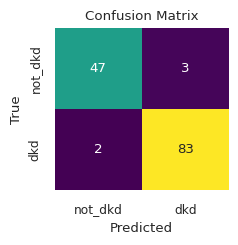

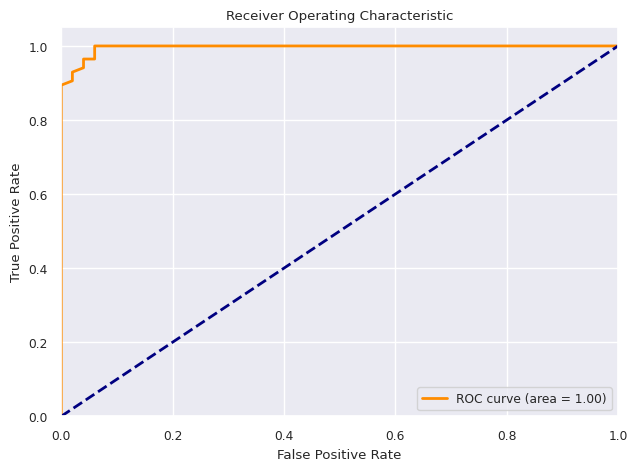

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---
##**SVM**

In [ ]:
#Using selected features
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier =  SVC(C=0.01, gamma=0.001, kernel='linear', random_state=42, probability=True)
classifier.fit(X_train_selected, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_selected)
print(accuracy_score(y_test, y_pred)*100)

94.07407407407408


Accuracy: 94.07407407407408
Precision: 0.9753086419753086
Recall: 0.9294117647058824
Specificity: 96.0
F1 Score: 95.18072289156626






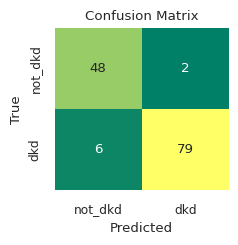

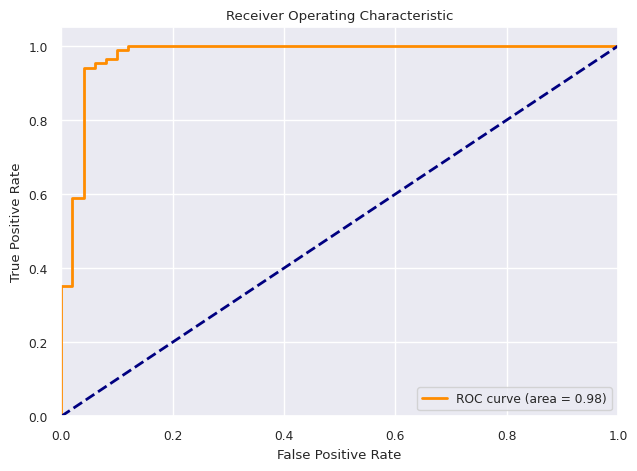

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="summer", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

####Firefly optimization for SVM####

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the objective function
def objective_function(params):
    # Unpack hyperparameters
    C, gamma = params

    # Define SVM model with given hyperparameters
    model = SVC(C=C, gamma=gamma, kernel='linear', random_state=42)

    # Train and predict
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy (objective to be maximized)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Firefly Algorithm parameters
num_fireflies = 10
max_generations = 50
alpha = 0.1  # Light absorption coefficient
beta_0 = 1.0  # Attraction coefficient at the start
gamma = 0.1  # Scaling factor for attractiveness

# Define the valid range for hyperparameters
C_bounds = (1, 10)
gamma_bounds = (0.001, 1.0)

# Initialize the positions of fireflies within the valid bounds
fireflies = np.random.rand(num_fireflies, 2)
fireflies[:, 0] = C_bounds[0] + fireflies[:, 0] * (C_bounds[1] - C_bounds[0])
fireflies[:, 1] = gamma_bounds[0] + fireflies[:, 1] * (gamma_bounds[1] - gamma_bounds[0])

for generation in range(max_generations):
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if objective_function(fireflies[i]) < objective_function(fireflies[j]):
                # Update the position of firefly i based on firefly j
                r = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta_0 * np.exp(-gamma * r**2)
                fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5)

# Find the best solution (firefly with the highest brightness)
best_firefly = max(fireflies, key=objective_function)
best_C, best_gamma = best_firefly
print("Best parameters : ",best_C, best_gamma)
# Train the final SVM model with the best hyperparameters
final_svm = SVC(C=best_C, gamma=best_gamma, kernel='linear', random_state=42)
final_svm.fit(X_train_selected, y_train)

# Evaluate on the test set
y_pred_final = final_svm.predict(X_test_selected)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final SVM Model Accuracy after tuning: {accuracy_final}")


Best parameters :  3.4936427701218564 0.4801680311559929
Final SVM Model Accuracy after tuning: 0.9407407407407408


####Ant colony optimization for SVM####

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Define the hyperparameter space (C and gamma)
C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1]
kernel = 'linear'  # We use the RBF kernel for SVM in this example

# Number of ants and iterations
num_ants = 10
num_iterations = 20

# ACO parameters
pheromone_matrix = np.ones((len(C_values), len(gamma_values)))
evaporation_rate = 0.1
exploration_prob = 0.2

best_hyperparameters = None
best_accuracy = 0.0

# ACO process
for iteration in range(num_iterations):
    for ant in range(num_ants):
        # Solution construction
        c_index = np.random.choice(len(C_values))
        gamma_index = np.random.choice(len(gamma_values))
        C = C_values[c_index]
        gamma = gamma_values[gamma_index]

        # Evaluate the solution using cross-validation
        clf = svm.SVC(C=C, kernel=kernel, gamma=gamma)
        scores = cross_val_score(clf, X_train_selected, y_train, cv=3)
        accuracy = np.mean(scores)

        # Update the best solution
        if accuracy > best_accuracy:
            best_hyperparameters = (C, gamma)
            best_accuracy = accuracy

        # Update pheromone levels
        pheromone_matrix[c_index][gamma_index] += (1.0 - evaporation_rate) * accuracy

    # Evaporation
    pheromone_matrix *= evaporation_rate

    # Exploration (encourage exploration by adding pheromone)
    pheromone_matrix += exploration_prob

# Select the best hyperparameters found by ACO
best_C, best_gamma = best_hyperparameters

# Train the final model with the best hyperparameters
final_model = svm.SVC(C=best_C, kernel=kernel, gamma=best_gamma)
final_model.fit(X_train_selected, y_train)

# Evaluate the final model
final_accuracy = np.mean(cross_val_score(final_model, X, y, cv=3))

print("Best hyperparameters (C, gamma):", best_hyperparameters)
print("Final model accuracy:", final_accuracy)


Best hyperparameters (C, gamma): (1, 0.1)
Final model accuracy: 0.96


In [ ]:
#Using all features
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = SVC(C=0.01, gamma=0.001, kernel = 'linear', random_state = 42, probability=True)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

93.33333333333333


Accuracy: 93.33333333333333
Precision: 0.975
Recall: 0.9176470588235294
Specificity: 96.0
F1 Score: 94.54545454545455






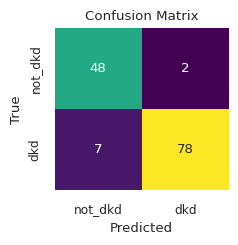

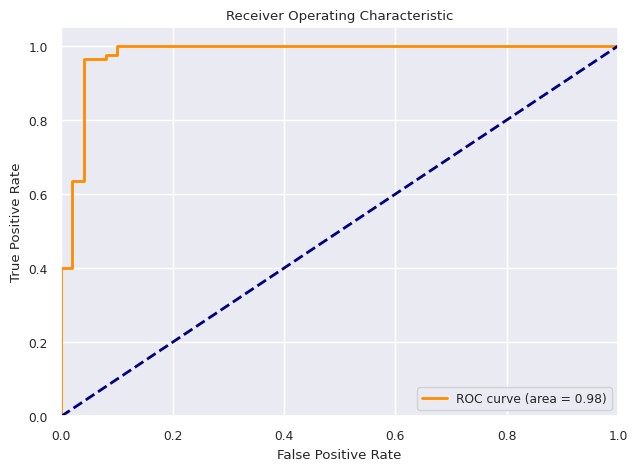

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity*100)

f1_sc = f1_score(y_test, y_pred)
print("F1 Score:", f1_sc*100)

print("\n")
print("\n")

# Calculate the confusion matrix
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_pred)

# Plot the colored confusion matrix

sns.set(font_scale=0.8) # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=["not_dkd", "dkd"], yticklabels=["not_dkd", "dkd"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##Comparison##

In [ ]:
# Order of models -> Logistic Regression, BTM, Random Tree, Random Forest, SVM
accuracy_all = [91.85,95.55,94.81,94.81,93.33]
precision_all = [98.68,98.76,98.75,95.34,97.5]
recall_all = [88.23,94.11,92.94,96.47,91.76]
specificity_all = [98.0,98.0,98.0,92.0,96.0]
f1_score_all = [93.16,96.38,95.75,95.90,94.54]

accuracy = [91.85,96.29,94.81,94.81,94.07]
precision = [98.68,98.78,98.75,95.34,97.53]
recall = [88.23,95.29,92.94,96.47,92.94]
specificity = [98.0,98.0,98.0,92.0,96.0]
f1_score= [93.16,97.0,95.75,95.90,95.18]

firefly_acc =[94.81,97.03,96.29,95.55,94.07]
ant_acc = [94.81,97.03,95.55,97.03,96.00]

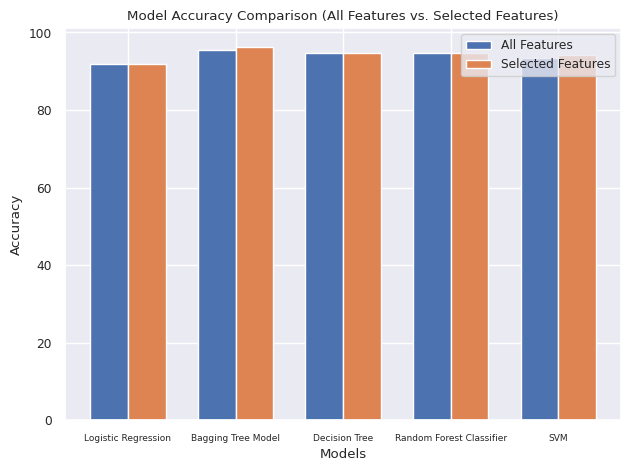

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy data for different models (replace with your actual data)
model_names = ['Logistic Regression', "Bagging Tree Model", "Decision Tree", "Random Forest Classifier", "SVM" ]

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Width of each bar in the histogram
bar_width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for accuracy with all features
bar1 = ax.bar(indices, accuracy_all, bar_width, label='All Features')

# Create bars for accuracy with selected features, shifted by bar_width
bar2 = ax.bar(indices + bar_width, accuracy, bar_width, label='Selected Features')

# Set the labels for the x-axis
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison (All Features vs. Selected Features)')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(model_names)
plt.xticks(fontsize=6.5)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


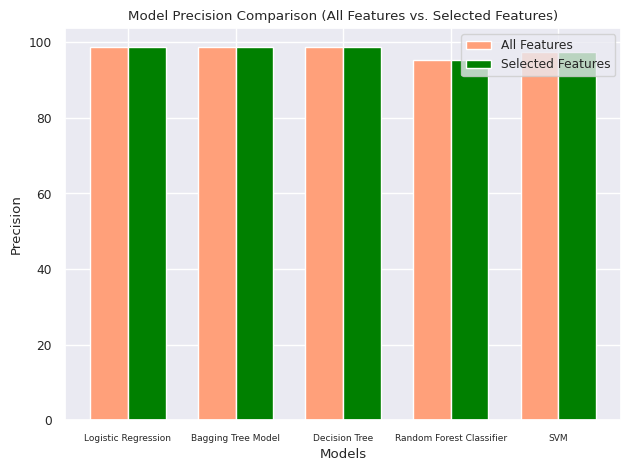

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy data for different models (replace with your actual data)
model_names = ['Logistic Regression', "Bagging Tree Model", "Decision Tree", "Random Forest Classifier", "SVM" ]

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Width of each bar in the histogram
bar_width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for accuracy with all features
bar1 = ax.bar(indices, precision_all, bar_width, label='All Features',color="lightsalmon")

# Create bars for accuracy with selected features, shifted by bar_width
bar2 = ax.bar(indices + bar_width, precision, bar_width, label='Selected Features',color="green")

# Set the labels for the x-axis
ax.set_xlabel('Models')
ax.set_ylabel('Precision')
ax.set_title('Model Precision Comparison (All Features vs. Selected Features)')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(model_names)
plt.xticks(fontsize=6.5)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


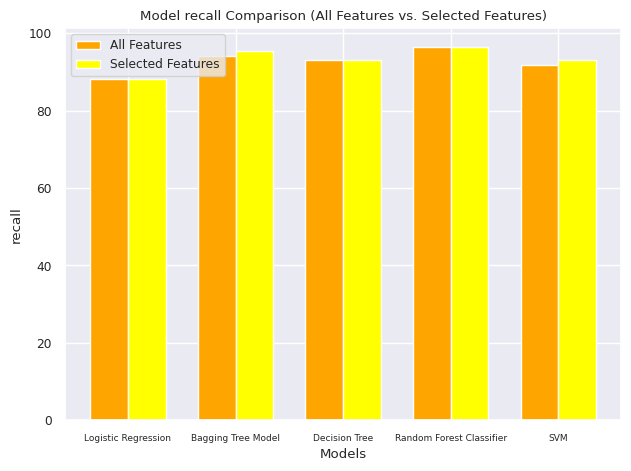

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy data for different models (replace with your actual data)
model_names = ['Logistic Regression', "Bagging Tree Model", "Decision Tree", "Random Forest Classifier", "SVM" ]

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Width of each bar in the histogram
bar_width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for accuracy with all features
bar1 = ax.bar(indices, recall_all, bar_width, label='All Features',color="orange")

# Create bars for accuracy with selected features, shifted by bar_width
bar2 = ax.bar(indices + bar_width, recall, bar_width, label='Selected Features',color="yellow")

# Set the labels for the x-axis
ax.set_xlabel('Models')
ax.set_ylabel('recall')
ax.set_title('Model recall Comparison (All Features vs. Selected Features)')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(model_names)
plt.xticks(fontsize=6.5)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


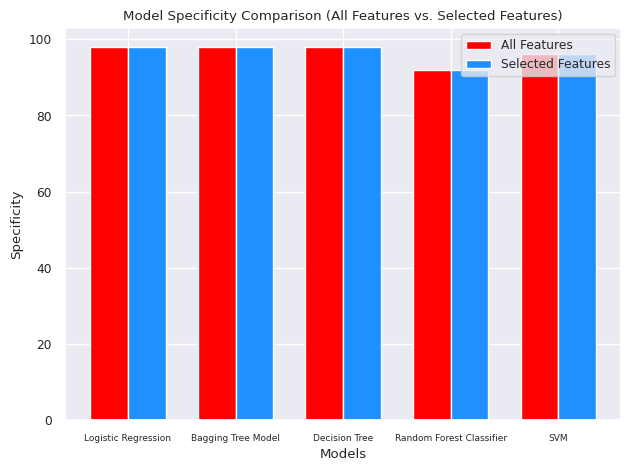

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy data for different models (replace with your actual data)
model_names = ['Logistic Regression', "Bagging Tree Model", "Decision Tree", "Random Forest Classifier", "SVM" ]

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Width of each bar in the histogram
bar_width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for accuracy with all features
bar1 = ax.bar(indices, specificity_all, bar_width, label='All Features',color="red")

# Create bars for accuracy with selected features, shifted by bar_width
bar2 = ax.bar(indices + bar_width, specificity, bar_width, label='Selected Features',color="dodgerblue")

# Set the labels for the x-axis
ax.set_xlabel('Models')
ax.set_ylabel('Specificity')
ax.set_title('Model Specificity Comparison (All Features vs. Selected Features)')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(model_names)
plt.xticks(fontsize=6.5)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


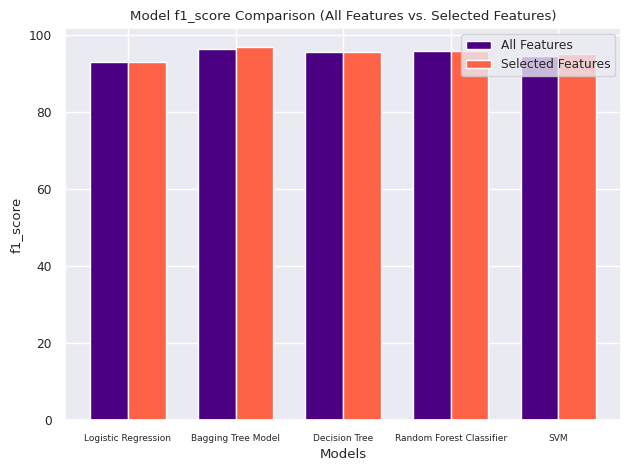

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy data for different models (replace with your actual data)
model_names = ['Logistic Regression', "Bagging Tree Model", "Decision Tree", "Random Forest Classifier", "SVM" ]

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Width of each bar in the histogram
bar_width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for accuracy with all features
bar1 = ax.bar(indices, f1_score_all, bar_width, label='All Features',color="indigo")

# Create bars for accuracy with selected features, shifted by bar_width
bar2 = ax.bar(indices + bar_width, f1_score, bar_width, label='Selected Features',color="tomato")

# Set the labels for the x-axis
ax.set_xlabel('Models')
ax.set_ylabel('f1_score')
ax.set_title('Model f1_score Comparison (All Features vs. Selected Features)')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(model_names)
plt.xticks(fontsize=6.5)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


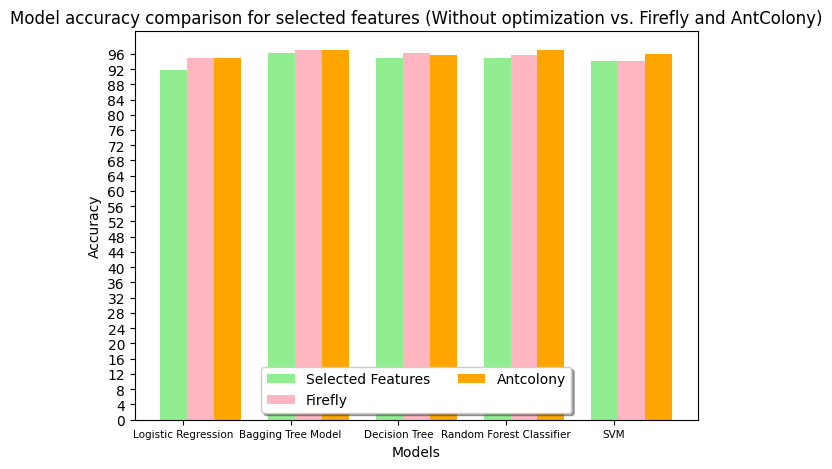

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy data for different models (replace with your actual data)
model_names = ['Logistic Regression', "Bagging Tree Model", "Decision Tree", "Random Forest Classifier", "SVM" ]

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Width of each bar in the histogram
bar_width = 0.25

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for accuracy with all features
bar1 = ax.bar(indices, accuracy, bar_width, label='Selected Features',color="lightgreen")

# Create bars for accuracy with selected features, shifted by bar_width
bar2 = ax.bar(indices + bar_width, firefly_acc, bar_width, label='Firefly',color="lightpink")
bar3 = ax.bar(indices + 2*bar_width, ant_acc, bar_width, label='Antcolony',color="orange")

# Set the labels for the x-axis
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model accuracy comparison for selected features (Without optimization vs. Firefly and AntColony)')
ax.set_xticks(indices + bar_width / 3)
ax.set_xticklabels(model_names)
plt.xticks(fontsize=7.5)
plt.yticks(np.arange(0,100,step=4))

# Add a legend
ax.legend()
plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=2)

# Display the plot
plt.tight_layout()
plt.show()
